In [24]:
# !pip install nltk
# !pip install sklearn
# !pip install gensim
# !pip install joblib
# !pip install graphviz
# !pip install langid
# !pip install pyenchant
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install pydotplus
# !pip install nvidia-ml-py3
# !pip install spacy
# !pip install treeinterpreter
# !pip install imblearn
# !pip install wordcloud
# !python -m spacy download en
# !pip install textblob
# !pip install vaderSentiment
# !pip install pydotplus
# !pip install treeinterpreter 
# !pip install imblearn

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
为 C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\spacy\data\en <<===>> C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\en_core_web_sm 创建的符号链接
[+] Linking successful
C:\Program Files (x86)\Microsoft Visual
Studio\Shared\Anaconda3_64\lib\site-packages\en_core_web_sm --> C:\Program Files
(x86)\Microsoft Visual
Studio\Shared\Anaconda3_64\lib\site-packages\spacy\data\en
You can now load the model via spacy.load('en')


In [6]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk,os,json,re,sklearn,gensim,json,joblib,random,graphviz,langid
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pydotplus
import spacy
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix
from IPython.display import Image, display
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor,export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from treeinterpreter import treeinterpreter as ti
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from gensim.models import Word2Vec
from sklearn.externals.six import StringIO
from nltk.corpus import stopwords
from sklearn.tree import export_graphviz
from wordcloud import WordCloud
sp = spacy.load('en')
analyzer = SentimentIntensityAnalyzer()
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
#dict=enchant.Dict("en_US")
Word1=[]
Word2=[]
stopwords={'then', 'to', 'himself', 'you', 'as', 'it', 'am', 'whom', 'was', "you're", 'll', 'once', 'from', 'does', 's', 'nor', 'their',
             'ma', 'a', 'while', 'any', 'yours', 'itself', 'during', 'by', 'where', 'its', 'on', 'no', 'yourselves', 'she', 'here', 'myself',
             'do', 'about', 'can', 'we', 'm', 'and', 'there', 'should', 'who', 'those', 'these', 'through', 't', 'below', 'what', 'your',
             'how', 'just', 'down', 'own', 'y', 'hers', 'is', 'so', 'being', 'the', "you've", "it's", 'more', 're', 'them', 'have', 'off',
             'been', 'him', 'this', 'will', 'each', 'all', 'herself', 'up', 'has', 'ours', 'because', "you'll", "you'd", 'his', 'very', 'are',
             'having', 'which', 'that', 'into', 'if', 'themselves', 'of', 'theirs', 'for', 'out', 'd', 'yourself', 'o', 'they', 'our', 'over',
             'he', 've', 'doing', 'some', "that'll", 'now', 'were', 'than', 'ourselves', 'above', 'did', 'under', 'me', 'her', 'until','my',
             'further', 'had', 'other', "she's", 'an', 'between', 'but', 'such', 'with', 'be', 'i', 'at', 'when', 'why', 'or', 'before', 'in'}

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dlt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dlt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dlt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dlt\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [48]:
def data_prepocessing(root_dir):
    with open(root_dir, "r") as file_r:
        filein = open(root_dir, "r")
        lineseen=set()
        corpus=[]
        lab=[]
        for line in filein:
            try:
                d = json.loads(line)
                text = d['text']
                text=filter_emoji(text)
                text=filter_html(text)
                text=filter_at(text)
                if text=='':
                    continue
                else:
                    if text not in lineseen:
                        corpus.append(text)
                        label_ini=d['label']
                        lab.append(label_ini)
                        lineseen.add(text)
            except Exception as e:
                print(e)
        return corpus,lab

In [49]:
def dataset_processing(root_real,root_fake,output_root1,output_root2):
    with open(output_root1,"a") as file_w:
        with open(root_real, "r") as filein:
            for line in filein:
                if langid.classify(line)[0] == 'en':
                    str={"text":line,"label":"0"}
                    jObj=json.dumps(str)
                    file_w.write(jObj)
                    file_w.write("\n")
        filein.close()
    file_w.close()
    with open(output_root2,"a") as file_w:
        with open(root_fake, "r") as filein:
            for line in filein:
                if langid.classify(line)[0] == 'en':
                    str={"text":line,"label":"1"}
                    jObj=json.dumps(str)
                    file_w.write(jObj)
                    file_w.write("\n")
        filein.close()
    file_w.close()

# extract information


def filter_emoji(text):
    emoji_pattern = re.compile(
        u"[\uD800-\uDBFF][\uDC00-\uDFFF]|"
        u"(\ud83d[\ude00-\ude4f])|"  
        u"(\ud83c[\udf00-\uffff])|"  
        u"(\ud83d[\u0000-\uddff])|"  
        u"(\ud83d[\ude80-\udeff])|"  
        u"(\ud83c[\udde0-\uddff])"
        , flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def filter_html(text):
    html_pattern = re.compile(
        r"\b(([\w-]+://?|www[.])[^\s()<>]+(?:[\w\d]+|([^[:punct:]\s]|/)))"
        , flags=re.UNICODE)
    return html_pattern.sub(r'', text)

def filter_at(text):
    at_pattern=re.compile(
        r"@.*?\s"
        , flags=re.UNICODE)
    return at_pattern.sub(r'', text)

def judge_dig(word):

    if re.search('[0-9]', word):
        return True
    else:
        return False

In [111]:
def uoload_file_to_s3(file_name, bucket, key_prefix):
    corpus, label = data_prepocessing(file_name) 
    s3 = boto3.client('s3')
    assert(len(corpus) == len(label))
    for i in range(len(corpus)):
        content = json.dumps({'text': corpus[i], 'label': label[i]})        
        key = "{}/{}".format(key_prefix,i)
        s3.put_object(Body=content, Bucket=bucket, Key=key)
    url = 's3n://{}/{}'.format(bucket, key_prefix)
    print('Done writing to {}'.format(url))

In [ ]:
role = get_execution_role()
bucket='fake-news-sentiment-analysis' # Put your s3 bucket name here
prefix = 'FakeNews/Gossip' # Used as part of the path in the bucket where you store data
uoload_file_to_s3('test_g.json',bucket, prefix)

In [50]:
def sampling_data(corpus,lab,num ,output):
        corpus=random.sample(corpus,num)
        label=random.sample(lab,num)
        with open(output, "a") as file_w:
                for i in range(len(corpus)):
                        str = {"text": corpus[i], "label": label[i]}
                        jObj = json.dumps(str)
                        file_w.write(jObj)
                        file_w.write("\n")
        file_w.close()
        return corpus

In [51]:
def sentimentanaly(corpus,title):
    count_neu=0
    count_neg=0
    count_pos=0
    for line in corpus:
        sentence=" ".join([text for text in line.split()])
        vs = analyzer.polarity_scores(sentence)
        value=vs.get('compound')
        if value>=0.05:
            count_pos=count_pos+1
        elif (value>-0.05 )and (value < 0.05):
            count_neu=count_neu+1
        else:
            count_neg=count_neg+1
    index = [0, 1, 2]
    num_list=[count_pos,count_neu,count_neg]
    name_list=["positive","neutral","negative"]

    for i in range(len(num_list)):
        num_list[i] = num_list[i]
    rects = plt.bar(range(len(num_list)), num_list, color='rgby')

    plt.title(title)
    plt.ylim(ymax=250000, ymin=0)
    plt.xticks(index, name_list)
    plt.ylabel("counts")
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 0.5, height, " ", ha='center', va='bottom')
    plt.show()

In [52]:
def wordcount(corpus):
    words_list=[]
    for line in corpus:
        sentence=sp(line)
        # word format
        regular = [word.lemma_ for word in sentence]
        text = ''
        for word in regular:
            text = text + word + " "
        sentence = sp(text)

        # word token
        words = [token.orth_ for token in sentence if not token.is_punct | token.is_space | token.is_digit]

        # stop words
        clean_tokens = [tok.lower() for tok in words if len(tok.lower()) > 1 and (tok.lower() not in stopwords)]

        for word in clean_tokens:
            words_list.append(word)

    print(len(words_list))

    # word frequency
    freqdist = nltk.FreqDist(words_list)
    vocabulary = freqdist.keys()
    vocabulary = list(set(vocabulary))
    print(len(vocabulary))
    vocabulary = vocabulary[:2000]

    return vocabulary

In [53]:
def wordsenti(features,title):
    count_neu=0
    count_neg=0
    count_pos=0
    with open(title, "w", encoding='utf-8') as filein:
        try:
            for word in features:
                vs = analyzer.polarity_scores(word)
                value=vs.get('compound')
                if value >= 0.05:
                    count_pos = count_pos + 1
                    filein.write(word + ":" +"posotive")
                    filein.write("\n")
                elif (value > -0.05) and (value < 0.05):
                    count_neu = count_neu + 1
                    filein.write(word + ":" +"neural")
                    filein.write("\n")
                else:
                    count_neg = count_neg + 1
                    filein.write(word + ":" + "negtive")
                    filein.write("\n")
        except Exception as e:
            print(e)
    filein.close()

    index = [0, 1, 2]
    num_list=[count_pos,count_neu,count_neg]
    name_list=["positive","neutral","negative"]

    for i in range(len(num_list)):
        num_list[i] = num_list[i]
    rects = plt.bar(range(len(num_list)), num_list, color='rgby')

    plt.title("Sentimental Analysis")
    plt.ylim(ymax=2000, ymin=0)
    plt.xticks(index, name_list)
    plt.ylabel("counts")
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 0.5, height, " ", ha='center', va='bottom')
    plt.show()

In [1]:
def creatVec(root_dir):
    with open(root_dir, "r") as file_r:
        filein = open(root_dir, "r")
        words_list = []
        corpus = []
        lab = []
        count = 0
        for line in filein:
            d = json.loads(line)
            text = d['text']
            sentence = sp(text)
            label_ini = d['label']
            lab.append(label_ini)

            # word format
            regular = [word.lemma_ for word in sentence]
            text = ''
            for word in regular:
                text = text + word + " "
            sentence = sp(text)

            # word token
            words = [token.orth_ for token in sentence if not token.is_punct | token.is_space | token.is_digit]

            # stop words
            clean_tokens = [tok.lower() for tok in words if len(tok.lower()) > 1 and (tok.lower() not in stopwords)]

            for word in clean_tokens:
                words_list.append(word)

            corpus.append(clean_tokens)

        print(len(corpus))
        filein.close()
        print(len(words_list))

        # word frequency
        freqdist = nltk.FreqDist(words_list)
        vocabulary = freqdist.keys()
        vocabulary = list(set(vocabulary))
        print(len(vocabulary))
        vocabulary = vocabulary[:60000]

    file_r.close()
    label = pd.DataFrame(data=lab, index=range(len(lab)), columns=['label'])
    return corpus, label, vocabulary

In [36]:
# def creatVec(training_data):
#     words_list=[]
#     corpus=[]
#     lab=[]
#     count=0
#     for line in training_data:
#         text = line['text']
#         sentence=sp(text)
#         label_ini=line['label']
#         lab.append(label_ini)

#         #word format
#         regular=[word.lemma_ for  word in sentence]
#         text=''
#         for word in regular:
#             text=text+word+" "
#         sentence=sp(text)
            
#         #word token
#         words = [token.orth_ for token in sentence if not token.is_punct | token.is_space | token.is_digit] 
    
#         #stop words
#         clean_tokens=[tok.lower() for tok in words if len(tok.lower())>1 and (tok.lower() not in stopwords)
#                     and not (judge_dig(tok.lower()))]
            
#         for word in clean_tokens:
#             words_list.append(word)
                
#         corpus.append(clean_tokens)
            
#     print(len(corpus))
#     print(len(words_list))

#     # word frequency
#     freqdist= nltk.FreqDist(words_list)
#     vocabulary= freqdist.keys()
#     vocabulary = list(set(vocabulary))
#     print(len(vocabulary))
#     vocabulary=vocabulary[:40000]

#     label = pd.DataFrame(data=lab, index=range(len(lab)), columns=['label'])
#     return corpus,label,vocabulary

In [37]:
def wordcloud(corpus):
    for line in corpus:
        all_words = ' '.join([text for text in line.split()])

    wordcloud = WordCloud(width=800, height=500, max_font_size=110, relative_scaling=0.5).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    
def wordcloud_f(wordlist):
    all_words = ' '.join(wordlist)

    wordcloud = WordCloud(width=800, height=500, max_font_size=110, relative_scaling=0.5).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [38]:
def dataset_balance(vector,label,features):

    smo = SMOTE(sampling_strategy='minority',random_state=42)
    corpus_smo, lab_smo = smo.fit_sample(vector, label)
    print(len(lab_smo))
    print(type(corpus_smo))
    corpus_smo=pd.DataFrame(data=corpus_smo,index=range(len(corpus_smo)),columns=features)
    lab_smo=pd.DataFrame(data=lab_smo, index=range(len(lab_smo)), columns=['labels'])
    print(corpus_smo)
    print(lab_smo)

    return corpus_smo,lab_smo

In [2]:
def dataset_set(vocabulary,corpus,label,feature_root,feature_senti):
    voc=[]
    voc.append(vocabulary[0:15000])
    voc.append(vocabulary[15000:30000])
    voc.append(vocabulary[30000:45000])
    voc.append(vocabulary[45000:60000])
    voc=np.array(voc)
    voc.flatten()
    feature_select=[]
    count=0
    for n in range(len(voc)):
        for k in range(len(voc[n])):
             feature_select.append(voc[n][k])
        df = pd.DataFrame(0,columns=feature_select, index=range(len(corpus)))
        for i in range(len(corpus)):
                 for l in range(len(corpus[i])):
                     if corpus[i][l] in feature_select:
                            index=feature_select.index(corpus[i][l])
                            df.iloc[i, index] = df.iloc[i, index]+1
        sk,feature_select,df=feature_selection(df, label, vocabulary,feature_root)

    print(df)
    wordcloud_f(feature_select)
    wordsenti(feature_select,feature_senti)
    return df,feature_select

In [3]:
def feature_selection(X,y,vocabulary,feature_root):

    new_features = []
    sk1 = SelectKBest(f_classif, k=2000)
    sk1.fit(X, y)

    mask = sk1.get_support()


    with open(feature_root, "w") as feature_w:
        for bool, feature in zip(mask, vocabulary):
            if bool:
                try:
                    new_features.append(feature)
                    feature_w.write(feature)
                    feature_w.write("\n")
                except Exception as e:
                    print(e)
    feature_w.close()
    df = pd.DataFrame(sk1.transform(X), columns=new_features, index=range(len(X)))
    print(new_features)

    return  sk1,new_features,df

In [4]:
def dataset_split(x, y):
    print(len(x))
    X_1 = x[:int(len(x) / 2 - 1)]
    X_2 = x[int(len(x) / 2):]
    y_1 = y[:int(len(y) / 2 - 1)]
    y_2 = y[int(len(y) / 2):]
    X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=1)
    X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=1)
    X_train = pd.DataFrame(X1_train).append(pd.DataFrame(X2_train))
    X_test = pd.DataFrame(X1_test).append(pd.DataFrame(X2_test))
    y_train = y1_train.append(y2_train)
    y_test = y1_test.append(y2_test)

    return X_train, X_test, y_train, y_test, X1_test, y1_test, X2_test, y2_test

In [5]:
def corss_validation(X,y):
    cv_scores = []
    num_features=[100,500, 800,1000,1200,1500,2000]
    for n in num_features:
        print(n)
        X_val=selectin_test(X,y,n)
        print(X_val)
        print(type(X_val))
        X_train, X_test, y_train, y_test,X1_test, y1_test, X2_test, y2_test = dataset_split(X_val, y)
        model=Decision_Tree_test(X_train, X_test, y_train, y_test)
        scores = cross_val_score(model,X_test ,y_test
                                 , cv=10,
                                 scoring='accuracy')
        cv_scores.append(scores.mean())
    plt.plot(num_features, cv_scores)
    plt.xlabel('Range')
    plt.ylabel('Accuracy')
    plt.show()
    plt.savefig('crossval_con.png')

In [43]:
def selectin_test(X,y,num):
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_classif
    sk1 = SelectKBest(f_classif, k=num)
    sk1.fit(X, y)

    return sk1.transform(X)

In [60]:
def naive_bayes(X_train,X_test,y_train,y_test):

    clf = GaussianNB()
    clf.fit(X_train, y_train.values.ravel())
    pred_y = clf.predict(X_test)
    print("Naive_bayes:")
    metric_method(y_test,pred_y)
    cm = confusion_matrix(y_test, pred_y)
    plot_confusion_matrix(cm, title='Naive_bayes Confusion matrix')


def Decision_Tree_test(X_train, X_test, y_train, y_test):
    dtree = DecisionTreeClassifier(max_depth=100, random_state=1, splitter="random", min_samples_split=10,
                                   min_samples_leaf=5)
    dtree.fit(X_train, y_train.values.ravel())
    return dtree

def Decision_Tree(X_train, X_test, y_train, y_test,features,
                  X1_test,y1_test,X2_test,y2_test,treeName):
    dtree = DecisionTreeClassifier(max_depth=100,random_state=1,splitter="random",min_samples_split=10,
                                   min_samples_leaf=5)
    dtree.fit(X_train, y_train)
    train=dtree.score(X_train, y_train)
    test=dtree.score(X_test, y_test)
    pred_y = dtree.predict(X_test)
    print("DecisionTree")
    metric_method(y_test, pred_y)
    cm = confusion_matrix(y_test, pred_y)
    plot_confusion_matrix(cm, title='DecisionTree Confusion matrix')

    #decision tree process
    dot_tree = tree.export_graphviz(dtree,
                                    out_file=None,
                                    feature_names=features)
    graph = pydotplus.graph_from_dot_data(dot_tree)
    Image(graph.create_png())
    graph.write_png(treeName)


    #feature contribution
    real_pred, real_bias, real_contrib = ti.predict(dtree, X1_test)
    fake_pred, fake_bias, fake_contrib = ti.predict(dtree,X2_test)

    contrib_avg_real=np.mean(real_contrib,axis=0)
    contrib_avg_fake = np.mean(fake_contrib, axis=0)
    real=[]
    fake=[]

    for i in range(len(contrib_avg_real)):
        real.append(contrib_avg_real[i][0])
    for i in range(len(contrib_avg_fake)):
        fake.append(contrib_avg_fake[i][1])

    real_feature=[]
    real_score=[]
    fake_feature=[]
    fake_score=[]
    filename="text_contri_dt.txt"
    #clear(filename)
    with open(filename, "a") as filein:
        for c, feature in sorted(zip(real,
                                 features),reverse=True):
            try:
                real_feature.append(feature)
                real_score.append(c)
                filein.write(feature+":"+str(c))
                filein.write("\n")
            except Exception as e:
                print(e)
        filein.write("////////////////////////////////////////////////////////\n")
    filein.close

    with open(filename, "a") as filein:
        for c, feature in sorted(zip(fake,
                                 features),reverse=True):
            try:
                fake_feature.append(feature)
                fake_score.append(c)
                filein.write(feature+":"+str(c))
                filein.write("\n")
            except Exception as e:
                print(e)
        filein.write("////////////////////////////////////////////////////////\n")
    filein.close()

    real_X=real_feature[:10]
    real_y=real_score[:10]
    fake_X=fake_feature[:10]
    fake_y=fake_score[:10]

    index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    plotbar(real_y, real_X,"realDT",index)
    plotbar(fake_y,fake_X,"fakeDT",index)


    return dtree




def RandomForest(X_train, X_test, y_train, y_test,features,
                  X1_test,y1_test,X2_test,y2_test):

    rf = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, random_state=1,min_samples_leaf=5)
    rf.fit(X_train, y_train.values.ravel())
    train = rf.score(X_train, y_train.values.ravel())
    test = rf.score(X_test, y_test.values.ravel())
    print(train)
    print(test)
    pred_y = rf.predict(X_test)
    print("RandomForest")
    metric_method(y_test, pred_y)
    cm=confusion_matrix(y_test,pred_y)
    plot_confusion_matrix(cm, title='RandomForest Confusion matrix')

    #feature contribution
    real_pred, real_bias, real_contrib = ti.predict(rf, X1_test)
    fake_pred, fake_bias, fake_contrib = ti.predict(rf,X2_test)

    contrib_avg_real=np.mean(real_contrib,axis=0)
    contrib_avg_fake = np.mean(fake_contrib, axis=0)
    real=[]
    fake=[]

    for i in range(len(contrib_avg_real)):
        real.append(contrib_avg_real[i][0])
    for i in range(len(contrib_avg_fake)):
        fake.append(contrib_avg_fake[i][1])

    real_feature=[]
    real_score=[]
    fake_feature=[]
    fake_score=[]
    filename="text_contri_rf.txt"
    #clear(filename)
    with open(filename, "a") as filein:
        for c, feature in sorted(zip(real,
                                 features),reverse=True):
            try:
                real_feature.append(feature)
                real_score.append(c)
                filein.write(feature+":"+str(c))
                filein.write("\n")
            except Exception as e:
                print(e)
        filein.write("////////////////////////////////////////////////////////\n")
    filein.close

    with open(filename, "a") as filein:
        for c, feature in sorted(zip(fake,
                                 features),reverse=True):
            try:
                fake_feature.append(feature)
                fake_score.append(c)
                filein.write(feature+":"+str(c))
                filein.write("\n")
            except Exception as e:
                print(e)
        filein.write("////////////////////////////////////////////////////////\n")
    filein.close()

    real_X=real_feature[:10]
    real_y=real_score[:10]
    fake_X=fake_feature[:10]
    fake_y=fake_score[:10]

    index = [0,1,2,3,4,5,6,7,8,9]

    plotbar(real_y, real_X,"realRF",index)
    plotbar(fake_y,fake_X,"fakeRF",index)

    return rf

In [61]:
def metric_method(label,pre_reduce):
    from sklearn import metrics
    print("Accuracy : %.2f" % metrics.accuracy_score(label, pre_reduce))
    print("Precision : %.2f" % metrics.precision_score(label,pre_reduce,average='macro'))
    print ("Recall : %.2f" % metrics.recall_score(label, pre_reduce,average='macro'))
    print ("F1 : %.2f" % metrics.f1_score(label, pre_reduce,average='weighted'))


def plot_confusion_matrix(cm, title, cmap=plt.cm.binary):
    labels=[0,1]
    tick_marks = np.array(range(len(labels))) + 0.5
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    np.set_printoptions(precision=2)
    plt.figure(figsize=(12, 8), dpi=120)
    plt.show()


def plotbar(num_list,name_list,title,index):
    for i in range(len(num_list)):
        num_list[i]=num_list[i]
    rects = plt.bar(range(len(num_list)), num_list, color='rgby')

    plt.title(title)
    plt.ylim(ymax=0.04, ymin=0)
    plt.xticks(index, name_list)
    plt.ylabel("contribution(%)")
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/0.5, height, " ", ha='center', va='bottom')
    plt.show()

In [62]:
def read_from_s3(bucket, key_prefix):
    s3 = boto3.client('s3')
    i = 0
    dataset = []
    while True:   
        key = "{}/{}".format(key_prefix,i)
        try:
            data = s3.get_object(Bucket=bucket, Key=key)
            dataset.append(json.loads(data.get('Body').read())) 
            i += 1
        except Exception as e:
            print(e)
            break
    return dataset

In [71]:
bucket='fake-news-sentiment-analysis'
prefix = 'FakeNews/Politics'
test_dataset = read_from_s3(bucket, prefix)
for line in test_dataset:
    print(line)

An error occurred (NoSuchKey) when calling the GetObject operation: The specified key does not exist.
{'text': 'Backtracking can t help you now   ', 'label': '0'}
{'text': 'Have you partied in our    ', 'label': '0'}
{'text': 'Good thank you  Now for  amp  to make a statement on their Holocaust Denying    ', 'label': '0'}
{'text': 'Brilliant piece RT V powerful column by Paul Krugman  in NYT  Eating the Irish    ', 'label': '0'}
{'text': '  Big Boss  Obama      campaign ad accused Romney of paying no taxes  Policy from the top down   ', 'label': '0'}
{'text': ' Black Conservatives  ', 'label': '0'}
{'text': 'The statement on the Sanctions and Anti Money Laundering Bill  given by the President of the Policy  amp  Resources Com    ', 'label': '0'}
{'text': 'US  Energy Information Administration forecast   Natgas Output Seen Up In       Still Below      Record  via  ', 'label': '0'}
{'text': 'In a statement signed by Femi Adesina  Special    ', 'label': '0'}
{'text': 'When Governor Ifeany

In [64]:
def classification(X_train, X_test, y_train, y_test,features,
                   X1_test,y1_test,X2_test,y2_test,treeName):
    naive_bayes(X_train, X_test, y_train, y_test)
    Decision_Tree(X_train, X_test, y_train, y_test,features,X1_test,y1_test,X2_test,y2_test,treeName)
    RandomForest(X_train, X_test, y_train, y_test,features,X1_test,y1_test,X2_test,y2_test)

def gossip():
    root_real = 'text_gossipcop_real.txt'
    root_fake = 'text_gossipcop_fake.txt'
    output_root1 = 'test1.json'
    output_root2 = 'test3.json'
    output = 'test_g.json'
    feature_root='feature_g.txt'
    feature_senti='feature_sent_g.txt'
    treeName='dececisonT-g.png'
    clear(output_root1)
    clear(output_root2 )
    clear(output)
    dataset_processing(root_real, root_fake, output_root1, output_root2)
    real,label_r = data_prepocessing(output_root1)
    real_corpus=sampling_data(real,label_r,5000,output)
    sentimentanaly(real_corpus,"Sentiment Analysis Gossip Real")
    real_word=wordcount(real_corpus)
    fake,label_f = data_prepocessing(output_root2)
    fake_corpus=sampling_data(fake,label_f,5000,output)
    sentimentanaly(fake_corpus,"Sentiment Analysis Gossip Fake")
    fake_word=wordcount(fake_corpus)
    wordsenti(real_word,"wordsentR_g.txt")
    wordsenti(fake_word,"wordsentF_g.txt")
    wordcloud(real_corpus)
    wordcloud(fake_corpus)
    corpus, label, vocabulary = creatVec(output)
    vector,features = dataset_set(vocabulary,corpus,label,feature_root,feature_senti)
    corss_validation(vector,label)
    X_train,X_test,y_train,y_test,X1_test,y1_test,X2_test,y2_test=dataset_split(vector,label)
    classification(X_train, X_test, y_train, y_test,features,X1_test,y1_test,X2_test,y2_test,treeName)


def politics():
    root_real = 'text_politifact_real.txt'
    root_fake = 'text_politifact_fake.txt'
    output_root1 = 'test2.json'
    output_root2 = 'test4.json'
    output='test_p.json'
    feature_root='feature_p.txt'
    feature_senti = 'feature_sent_p.txt'
    treeName = 'dececisonT-p.png'
    #clear(output_root1)
    #clear(output_root2 )
    #clear(output)
#     dataset_processing(root_real, root_fake, output_root1, output_root2)
#     real,label_r = data_prepocessing(output_root1)
#     real_corpus=sampling_data(real,label_r,250000,output)
#     sentimentanaly(real_corpus,"Sentiment Analysis Politics Real")
#     real_word=wordcount(real_corpus)
#     fake,label_f = data_prepocessing(output_root2)
#     fake_corpus=sampling_data(fake,label_f,60000,output)
#     sentimentanaly(fake_corpus,"Sentiment Analysis Politics Fake")
#     fake_word=wordcount(fake_corpus)
#     wordsenti(real_word,"wordsentR_p.txt")
#     wordsenti(fake_word,"wordsentF_p.txt")
#     wordcloud(real_corpus)
#     wordcloud(fake_corpus)
    corpus, label, vocabulary = creatVec(output)
    vector,features = dataset_set(vocabulary,corpus,label,feature_root,feature_senti)
    vector, label = dataset_balance(vector, label,features)
    corss_validation(vector,label)
    X_train,X_test,y_train,y_test,X1_test,y1_test,X2_test,y2_test=dataset_split(vector,label)
    classification(X_train, X_test, y_train, y_test,features,X1_test,y1_test,X2_test,y2_test,treeName)

def combine():
    root_real1= 'text_gossipcop_real.txt'
    root_fake1='text_gossipcop_fake.txt'
    root_real = 'text_politifact_real.txt'
    root_fake = 'text_politifact_fake.txt'
    output_root1 = 'test5.json'
    output_root2 = 'test6.json'
    output='test_all.json'
    feature_root='feature_all.txt'
    feature_senti = 'feature_sent_all.txt'
    treeName = 'dececisonT-all.png'
    #clear(output_root1)
    #clear(output_root2 )
    #clear(output)
#     dataset_processing(root_real1, root_fake1, output_root1, output_root2)
#     dataset_processing(root_real, root_fake, output_root1, output_root2)
#     real,label_r = data_prepocessing(output_root1)
#     real_corpus=sampling_data(real,label_r,250000,output)
#     sentimentanaly(real_corpus,"Sentiment Analysis All Real")
#     real_word=wordcount(real_corpus)
#     fake,label_f = data_prepocessing(output_root2)
#     fake_corpus=sampling_data(fake,label_f,250000,output)
#     sentimentanaly(fake_corpus,"Sentiment Analysis All Fake")
#     fake_word=wordcount(fake_corpus)
#     wordsenti(real_word,"wordsentR_all.txt")
#     wordsenti(fake_word,"wordsentF_all.txt")
#     wordcloud(real_corpus)
#     wordcloud(fake_corpus)
    corpus, label, vocabulary = creatVec(output)
    vector,features = dataset_set(vocabulary,corpus,label,feature_root,feature_senti)
    #corss_validation(vector,label)
    X_train,X_test,y_train,y_test,X1_test,y1_test,X2_test,y2_test=dataset_split(vector,label)
    classification(X_train, X_test, y_train, y_test,features,X1_test,y1_test,X2_test,y2_test,treeName)


def clear(file_root):
    file1 = open(file_root,'w+')
    file1.truncate()

50000
507882
28797
['kind', 'rescinds', 'overrate', 'relieved', 'victims', 'human', 'todd', 'indefinitely', 'urge', 'pierson', 'gina', 'unzip', 'braxton', 'mchugh', 'god', 'stroke', 'aldean', 'chadwick', 'rob', 'aw', 'showcases', 'lohan', 'biel', 'clarkson', 'really', 'lauren', 'coaches', 'ignore', 'minka', 'efforts', '1st', 'ye', 'franklin', 'remember', 'step', 'grade', 'scarborough', 'circuit', 'total', 'hbo', 'june', 'zarin', 'olympios', 'makeup', 'caputo', 'abasolo', 'huge', 'amelia', 'publicity', 'kevin', 'outlander', 'ugh', 'gotti', 'south', 'kardashians', 'speculate', 'brie', 'jr.', 'im', 'forgot', 'revisit', 'le', 'bitter', 'alcohol', 'hear', 'shockers', 'angelinajolie', 'illustrated', 'commit', 'waste', 'post', 'birthday', 'proceeds', 'thecrown', 'retirement', 'charvet', 'footage', 'badgley', 'flaunt', 'bure', 'lauryn', 'oscars', 'ora', 'desert', 'destroyed', 'rae', 'interview', 'attends', 'cathriona', 'nye', 'beyhive', 'papers', 'saga', 'pablo', 'schroeder', 'ozzy', 'ago', 'l

'gbk' codec can't encode character '\u200b' in position 8: illegal multibyte sequence
'gbk' codec can't encode character '\u200b' in position 7: illegal multibyte sequence
'gbk' codec can't encode character '\u0119' in position 2: illegal multibyte sequence
'gbk' codec can't encode character '\u203c' in position 0: illegal multibyte sequence
'gbk' codec can't encode character '\x91' in position 0: illegal multibyte sequence
'gbk' codec can't encode character '\u2022' in position 0: illegal multibyte sequence
'gbk' codec can't encode character '\u0111' in position 3: illegal multibyte sequence
['happened', 'dreamed', '/alcohol/', 'gene', 'avri', 'prefer', 'bachelor\u200b', 'fowjdlelnrkw', 'iostoconjennifer', 'mazel', 'abe', 'drdimitriosbaltzi', 'armyofonekidney', 'jungwirth', 'bice', 'dermot', 'colonel', 'loops', 'hypnotherapy', 'pomellato', 'eagle', 'conners', 'delay', 'blues', 'faced', 'street', 'rescinds', 'spe', 'nbc15', 'resize', 'ikr', 'gawd', 'hay', 'rejuvenate', 'smooches', 'chu

       happened  dreamed  /alcohol/  gene  avri  prefer  bachelor​  \
0             0        0          0     0     0       0          0   
1             0        0          0     0     0       0          0   
2             0        0          0     0     0       0          0   
3             0        0          0     0     0       0          0   
4             0        0          0     0     0       0          0   
5             0        0          0     0     0       0          0   
6             0        0          0     0     0       0          0   
7             0        0          0     0     0       0          0   
8             0        0          0     0     0       0          0   
9             0        0          0     0     0       0          0   
10            0        0          0     0     0       0          0   
11            0        0          0     0     0       0          0   
12            0        0          0     0     0       0          0   
13            0     

[50000 rows x 2000 columns]


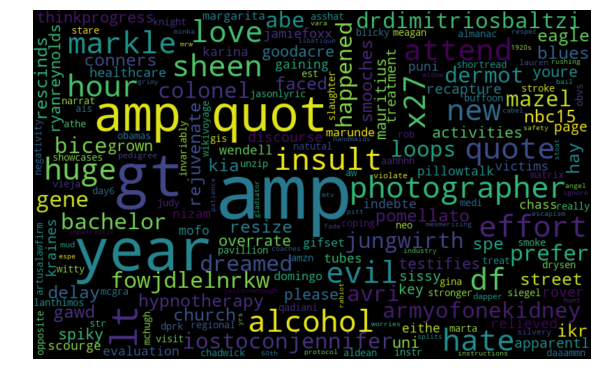

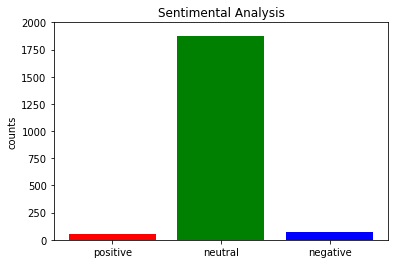

50000
DecisionTree
Accuracy : 0.77
Precision : 0.77
Recall : 0.77
F1 : 0.77


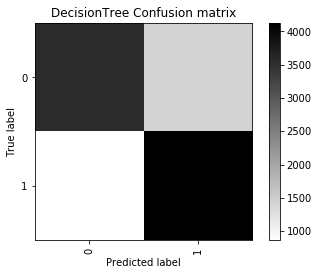

1336 [label="stronger"--and <= 0.5\ngini = 0.386\nsamples = 555\nvalue = [410, 145]"] ;
     ^
Expected "}" (at char 110469), (line:2674, col:6)


AttributeError: 'NoneType' object has no attribute 'write_png'

In [65]:
def main():
    import warnings
    warnings.filterwarnings('ignore')
    gossip()
    #politics()
#     combine()

if __name__=='__main__':
    main()